In [ ]:
import matplotlib.pyplot as plt

# Abstract
Searches for new physics at the LHC often involve looking for excesses on top of falling backgrounds. Typical approaches model the background using polynomials or other parametric families. Polynomials are nice because they theoretically provide unbiased estimates of the background, however they can lead to undesirable behavior in the tails. Parametric families can be found which provide accurate estimates but are often ad-hoc and can lead to biased estimates. To address these biases one typically considers several parametric families at once to estimate the systematic uncertainty. In this work we motivate the use of the exponential mixture model to estimate long tailed distributions. The exponential mixture model is unique in representation and can approximate any completely monotonic function to arbitrary precision. We show that the model gives comparable performance to other methods in data and in toy studies that it is flexible enough to approximate many commonly used parametric families.

# Introduction

Outline:
- Intro
- Previous work
- Motivation
    - Less assumptions
- Summary of contributions
- Outline of paper

Searches for new physics often employ a statistical framework which consists of a signal and a background model. In most cases the standard model backgrounds are complicated enough that there is no analytic form for the background. In some cases the best thing to do is to use a non-parametric approach, deriving the background from Monte Carlo simulations of the standard model processes and detector response. In such cases it's not always clear that one is including all the relevant processes and validation of the method comes from cross-checks performed in data. In other cases people choose to use a parametric approach, modeling the background with some analytic function. The advantage of this approach is that it is often easier to implement as we do not need to worry about the details of the simulation, this is especially true when the background is not well understood. The disadvantage is that we need to choose a functional form and this choice can lead to biases which can be difficult to quantify. In this work we will focus on the case of a falling background, which is the most common case in high mass searches. We will show that the hyperexponential model is a good choice for modeling falling backgrounds and that it has several advantages over other methods.

One commonly used analytic form for the background is a polynomial. Polynomials are nice because of their theoretical properties which guarantee that they are unbiased estimates of the background. However, polynomials can lead to undesirable behavior in the tails where they can diverge to infinity after running out of data. Any deviation from a falling background could be evidence of new physics so it would be nice to have a model which incorporates some physics intuition. Other approaches involve using some parametric family of functions which are not necessarily unbiased but lack the undesirable flexibility of polynomials. The functions used are often ad-hoc and are derived from backgrounds specific to a given analysis. The bias is usually quantified by considering several parametric families at once, in a method known as discrete profiling or the envelope method.

# Background

Outline:
- Existing models/searches
    - Higgs search (polynomials)
    - High mass diphoton (...)
- Tail Behavior
- Uncertainty estimation

# Exponential Mixture Model

Outline:
- Mixture models
- Categorical Mixing distribution
- Bernstein's theorem
    - Statement
    - Completely monotone functions
        - Definition
        - Characterization
- Exponential Mixture
- Reparameterization for identifiability
- Constraining tail probabilities for uncertainty estimation

Mixture models are effective tools for modeling mixed effects and approximating more complicated distributions. A simple example is a weighted sum of two normal distributions which uses the normal distribution as the base density function and a categorical distribution (with two categories) as the mixing distribution for the normal means. More generally for some base density function $p(x | \theta)$ and a continuous mixing distribution with density $p(\theta)$ for $\theta \in [0, \infty)$, this is written as:
$$
f(x) = \int_0^\infty p(\theta) p(x | \theta) d\theta \, .
$$ {#eq-mixture-density}
The mixing distribution can be complicated but for simplicity we will assume that it is a categorical distribution with $k$ categories. In this case the mixture density reduces to:
$$
f(x) = \sum_{i=1}^k w_i p(x | \theta_i) \, ,
$$ {#eq-finite-mixture-density}
where $w_i$ are the relative probabilities of each category and $\theta_i$ are the base density parameters associated with each category. Intuitively, one can think of the finite mixture assumption as a non-parametric approximation of some more complicated continuous mixture density. In practice the number of categories $k$ is chosen based on the data and the desired level of complexity.

In many cases one might expect the density in question to be monotonically decreasing. One class of functions which is particularly useful in this case is the class of completely monotone functions. These functions are characterized by the following relation:
\begin{equation}
(-1)^n\frac{d^n}{dx^n} f(x) \geq 0 \, ,
\end{equation}
for all $x > 0$. Some examples of completely monotone functions are:
\begin{equation}
f(x) = \begin{cases}
c & \text{for } c \geq 0 \\
e^{-ax} & \text{for } a \geq 0 \\
\frac{1}{(\lambda + \mu x)^\nu} & \text{for } \lambda, \mu, \nu \geq 0 \\
\log(b+\frac{c}{x}) & \text{for } b \geq 1, c >0 \\
af(x) + bg(x) & \text{for } a, b \geq 0 \text{ and } f, g \in \mathcal{CM} \\
f(x)g(x) & \text{for } f, g \in \mathcal{CM} \\
f(g(x)) & \text{for } f, g \in \mathcal{CM} \\
\sum_{k=1}^\infty a_k f(x)^k & \text{for } a_k \geq 0 \text{ and } f \in \mathcal{CM} \\
e^{f(x)} & \text{for } f \in \mathcal{CM} \\
\end{cases}
\end{equation}
where $\mathcal{CM}$ is the class of completely monotone functions \cite{miller}.

A useful theorem in this context is Bernstein's theorem on monotone functions. This theorem states that every completely monotone function on $(0, \infty)$ is the Laplace transform of a unique measure $\mu$ on $[0, \infty)$, i.e.:
\begin{equation}
f(\lambda) = \int_0^\infty e^{-\lambda t} \mu(dt) \, ,
\end{equation}
where $\lambda > 0$ \cite{bernstein}. A corollary of this theorem is that every completely monotone function is a mixture of exponential functions.

Exponential mixture models are used across a wide range of applications, including survival analysis, reliability engineering, queuing theory, and density estimation to name a few. 

The exponential mixture model is given by
$$
f(x) = \sum_{i=1}^k w_i e^{-r_i x}
$$
where $\sum_{i=1}^k w_i = 1, w_i \geq 0$ and $r_i > 0$. The hyperparameter $k$ controls the number of mixture components.

If the background pdf $f$ is completely monotonic i.e.
$$
\frac{d^n}{dx^n} f(x) \geq 0
$$
for all $n$ and $x$, then by Bernstein's theorem $f$ is a (possibly infinite) mixture of exponentials [??]. This model will not fit non-monotonic behavior so overfitting is of little concern for a resonant search. In practice $k$ cannot be arbitrarily large as we run into computational issues reltated to the identifiability of the parameters (see section \ref{inference}).

There is one larger issue of identifiability though: every term in this pdf is equal in terms of flexibility. This means that $r_i$ and $r_j$ may be used to describe the same effect in the data. This leads to flat ridges and valleys in the likelihood function which is not necessarily an issue for prediction itself but can cause problems for uncertainty estimation. 

To overcome this obstacle we decide to reparametrerize the rate parameters $r_i$ to be ordered. To do this we redefine $r_i$ to be:
$$
r_i = \sum_{j=1}^i \alpha_j \, ,
$$
where $\alpha_j \in \mathbb{R}^+$.

% Counter argument

As the rate difference $\alpha_j$ goes to zero we encounter the same issue right? Is there any benefit to this parameterization then? So what exactly is the issue in the first place? If the rate parameters are the same (or close enough) then the probabilities (mixture weights) will be linearly dependent. For the most part I'd say this suggests over-parameterization - if the parameters are the same it means that there are no residuals which are improved by having an additional parameter. Is a bounded parameter less likely to go to zero - probably so for Minuit because it uses some transformation which has trouble with parameters on the boundaries - I think the unbound parameter needs to go to infinity to reach the boundary. But the rate difference doesn't need to be zero for them to be close enough to describe the same effect - there is uncertainty in all the parameters anyway. I wonder, is this ordered parameterization less likely to get stuck in this $r_i\approx r_j$ mode.

In this paradigm we would need some penalty to keep $\alpha_j$ from going to zero - that or some lower bound. Intuitively I prefer the penalty approach but both are subjective. I could multiply my pdf by $\prod e^{-b/\alpha_j}$, but then what choice of $b$ is appropriate? It should probably depend on the scale of the rate parameters.

# Inference

Outline:
- ROOT
    - Minuit
    - HESEE/MINOS
- AIC/BIC
- Profile Likelihood?
- Goodness of fit
- Correlated parameters

# Simulation Studies

Outline:
- Metrics for success
    - Goodness of fit
    - Bias (Error)
    - Coverage
- Dataset size dependence
- Tail probability parameter

To study the performance of the hyperexponential model on the particular background functions used in CMS we generate a number of toys from a particular function and asses the bias and coverage as functions of $x$. The bias and coverage are measured with respect to the generating pdf.

In [ ]:
# Get and plot the AIC/BIC for the toy data
# toy_aic_bic_df = get_AIC_BIC_loo(t=toy_data, tag="toy_data")
# plot_AIC_BIC_loo(df=toy_aic_bic_df,)

In [ ]:
# Generate toy data
n_toy_events = data.numEntries()

toy_model = exppow_model
# toy_model = dijet_model

toy_pdf = toy_model.pdf

toy_data = ROOT.RooDataSet(
    "toy_data", "toy_data",
    ROOT.RooArgSet(x),
    ROOT.RooFit.Import(
        toy_pdf.generate(ROOT.RooArgSet(x), n_toy_events)
    )
)

# Fit the toy data with the Exponential Mixture Model
emm_toy = bkg.ExponentialMixtureModel(x, 3)
emm_toy_fit_result = emm_toy.pdf.fitTo(toy_data, ROOT.RooFit.Save())

# Plot the toy data and the fit
bkg.plot_fits(
    toy_data, x, bins,
    [emm_toy, dijet_model],
    ["Exponential Mixture (Toy Fit)", toy_model.name],
    [emm_toy_fit_result, None],
)

In [ ]:
# Submit jobs scanning the space of n_exp and n_events per toy
# TODO: Verify that this is correct. For some reason the shape of the bias seems too consistent across toys.
import os
from analysis.tools.storage_config import scripts_dir
from analysis.tools import condor

script = f"{scripts_dir}/bkg_study_get_bias_inputs.py"

# toy_model_name = "Dijet"
toy_model_name = "ExpPow"

n_toys = 1000
n_exps = [2,3,4,5,6]
n_events_per_toy_list = [5000, 10000, 20000, 50000]

condor_tasks = []
for n_exp in n_exps:
    for n_events_per_toy in n_events_per_toy_list:
        task = condor.Task(bkg.get_bias_inputs, (toy_model_name, n_toys, n_events_per_toy, n_exp), {})
        condor_tasks.append(task)
condor.submit_tasks("bkg_study_get_bias_inputs", condor_tasks)


I'm not doing this right I think. For one the errors on the fit prediction may be asymmetric but this is not accounted for in what I'm doing here.

In [ ]:
# Plot the bias results

df = bkg.get_bias_info(toy_model.name, n_toys, n_events_per_toy_list, n_exps)
bins = np.linspace(500, 4000, 100)

fig, axs = plt.subplots(
    len(n_events_per_toy_list), 1,
    figsize=(10, 6 * len(n_events_per_toy_list)),
    sharex=True,)

for i, n_events_per_toy in enumerate(n_events_per_toy_list):
    _df = df[df['n_events_per_toy'] == n_events_per_toy]

    for n_exp in n_exps:
        __df = _df[_df['n_exp'] == n_exp]
        if __df.empty:
            print(f"No data for n_exp={n_exp} with n_events_per_toy={n_events_per_toy}. Skipping.")
            continue
        axs[i].step(
            bins, __df['pull_mean'].values[0],
            where='post',
            label=f'n_exp={n_exp}',
            linewidth=2,
        )

    axs[i].set_ylabel("(fit-true)/fit_error")
    axs[i].set_title(f"{n_toys} Toys, {n_events_per_toy} Events per Toy")
    axs[i].legend(loc='upper right', fontsize='small')
    
    # Draw horizontal line at zero for reference
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=1)

axs[-1].set_xlabel("Diphoton Mass [GeV]")

In [ ]:
# Plot the coverage percentage
bins = np.linspace(500, 4000, 100)

fig, axs = plt.subplots(
    len(n_events_per_toy_list), 1,
    figsize=(10, 6 * len(n_events_per_toy_list)),
    sharex=True,)

for i, n_events_per_toy in enumerate(n_events_per_toy_list):
    _df = df[df['n_events_per_toy'] == n_events_per_toy]

    for n_exp in n_exps:
        __df = _df[_df['n_exp'] == n_exp]
        if __df.empty:
            print(f"No data for n_exp={n_exp} with n_events_per_toy={n_events_per_toy}. Skipping.")
            continue

        axs[i].step(
            bins, __df['covered_percentage'].values[0],
            where='post',
            label=f'n_exp={n_exp}',
            linewidth=2,
        )

    axs[i].set_ylabel("Coverage Percentage (%)")
    axs[i].set_title(f"{n_toys} Toys, {n_events_per_toy} Events per Toy")
    axs[i].legend(loc='upper right', fontsize='small')
    axs[i].set_ylim(99, 101)  # Set y-limits to ensure visibility of the 95% line

    # Draw horizontal line at 95% for reference
    axs[i].axhline(95, color='gray', linestyle='--', linewidth=1)
axs[-1].set_xlabel("Diphoton Mass [GeV]")

# Diphoton Mass Spectrum

Outline:
- Model comparsion in data
- Goodness of fit

In [1]:
import ROOT
import emm

Welcome to JupyROOT 6.30/04
Top directory: /home/atownse2/Projects


In [34]:
# Get data
data_tree = emm.get_data()
bins = emm.get_fine_binning()

x = ROOT.RooRealVar("x", "Diphoton Mass [GeV]", 500, 4000)
data = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(x), ROOT.RooFit.Import(data_tree))

Loaded 5036 diphoton invariant masses from data.


In [74]:
def fit_and_plot(model, data, x, fit_result=None):
    if fit_result is None:
        fit_result = model.pdf.fitTo(data, ROOT.RooFit.Save())

    emm.plot_fits(
        data, x,
        [model],
        [model.name],
        [fit_result, None, None],
        logx=True,
        nbins=128,
    )
    emm.plot_correlation_matrix(fit_result)

    # print("nll:", nll.getVal())
    for var_name, var in model.fitted.items():
        print(f"{var_name}: {var.getVal()} ± {var.getError() if hasattr(var, 'getError') else 'N/A'}")


Rate scaling factor: -0.00565722090722949


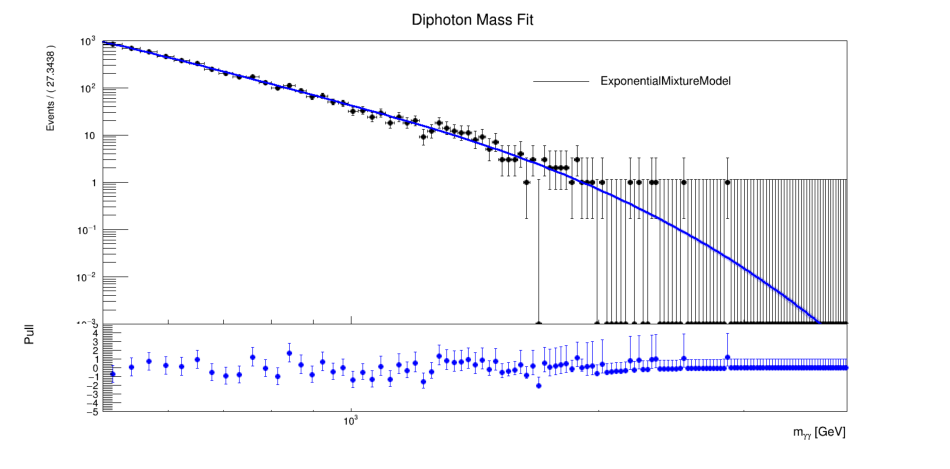

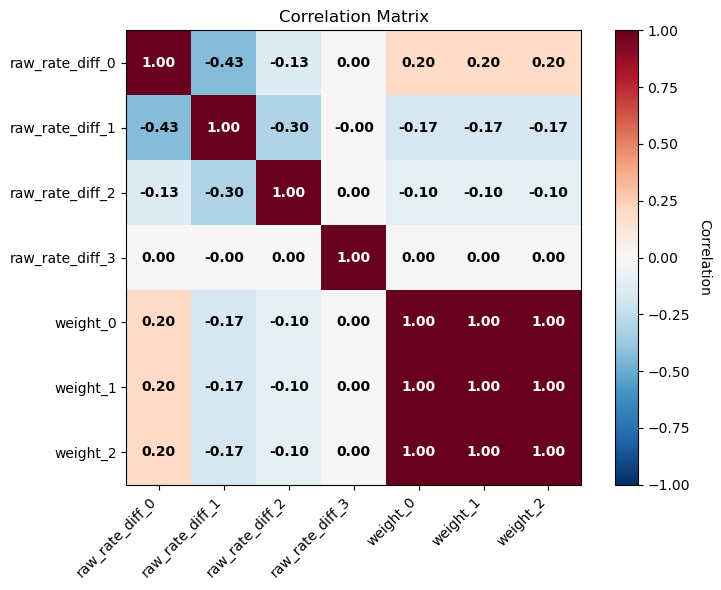

weight_0: 0.2499994218346609 ± 3.732636693065672e-07
weight_1: 0.25813720671376833 ± 3.637896155150866e-07
weight_2: 0.4918729009416857 ± 2.694715293960481e-07
raw_rate_diff_0: 0.6505568559332112 ± 0.011535646655248755
raw_rate_diff_1: 0.1416195179107617 ± 0.023640662345686632
raw_rate_diff_2: 0.9080963704822403 ± 0.04501922589696555
raw_rate_diff_3: 7.46708287993453 ± 577.2755862120132
raw_rate_0: 0.6505568559332112 ± N/A
raw_rate_1: 0.7921763738439729 ± N/A
raw_rate_2: 1.7002727443262131 ± N/A
raw_rate_3: 9.167355624260743 ± N/A
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (exp_0,exp_1,exp_2,exp_3)
Minuit2Minimizer: Minimize with max-calls 3500 convergence for edm < 1 strategy 1
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.0958
[#0] WARNING:Eval -- RooAddPdf::updateCoefC

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       31936.96713 Edm =       8272.882818 NCalls =     29
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 31827.31467
  Edm           : 2316.822699
  Internal parameters:	[     -1.507540228     -1.507540228     -1.507540228     -1.088538187    -0.5235987756    -0.5049075288   -0.01625559141]	
  Internal gradient  :	[      61171.84273      17522.33275      7905.391637  5.429124495e-05       47114938.4     -931.4180076     -676.2847585]	
  Internal covariance matrix:
[[  6.6568403e-07              0              0              0              0              0              0]
 [              0  1.1888315e-05              0              0              0              0              0]
 [              0      

In [83]:
# Fit and plot
model = emm.ExponentialMixtureModel(x, 4, data.mean(x))
fit_and_plot(model, data, x)

Rate scaling factor: -0.00565722090722949


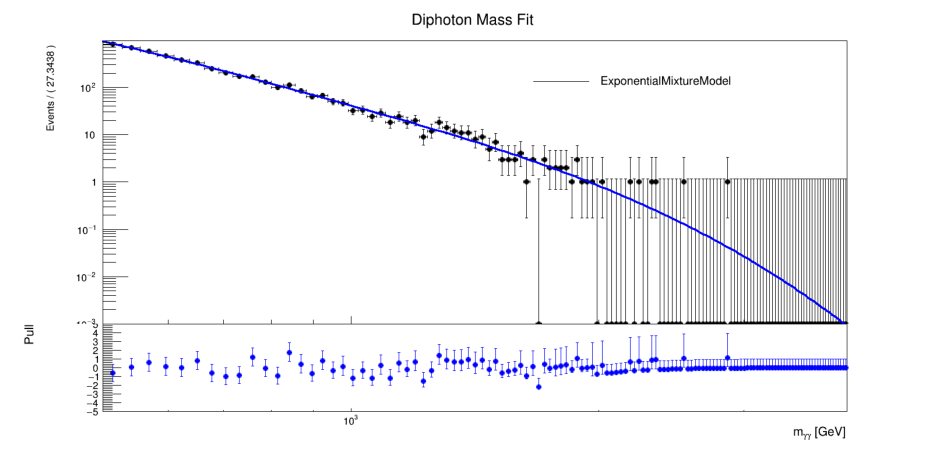

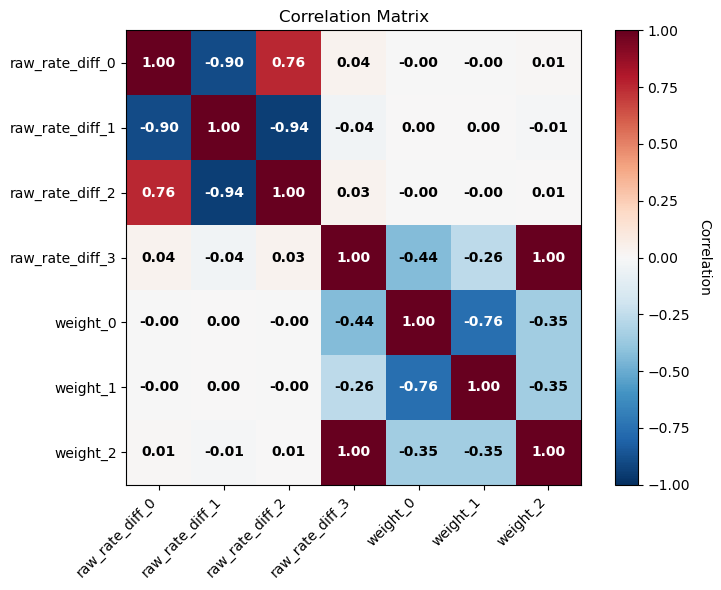

weight_0: 0.24999995034260072 ± 0.0
weight_1: 0.2581373094816944 ± 0.0
weight_2: 0.4918725758566635 ± 0.0
raw_rate_diff_0: 0.5936216650644325 ± 0.0
raw_rate_diff_1: 0.3271544600017683 ± 0.0
raw_rate_diff_2: 0.7279967922494573 ± 0.0
raw_rate_diff_3: 958.6033234880824 ± 0.0
raw_rate_0: 0.5936216650644325 ± N/A
raw_rate_1: 0.9207761250662008 ± N/A
raw_rate_2: 1.6487729173156582 ± N/A
raw_rate_3: 960.2520964053981 ± N/A
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (exp_0,exp_1,exp_2,exp_3)
Minuit2Minimizer: Minimize with max-calls 3500 convergence for edm < 1 strategy 1
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.0958
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.0958
[#0] WARNING:Eval -- RooAddPdf::update

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       31936.96713 Edm =       8249.105738 NCalls =     29
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 31827.31336
  Edm           : 2270.411405
  Internal parameters:	[     -1.507698461     -1.507698461     -1.507698461     -1.101622277    -0.5235987756    -0.5049061285   -0.01625559141]	
  Internal gradient  :	[      61018.70828      17478.46883      7885.588373 -0.0004094215143      583215365.8      604776688.4     -676.4026169]	
  Internal covariance matrix:
[[  6.6794916e-07              0              0              0              0              0              0]
 [              0  1.1850024e-05              0              0              0              0              0]
 [              0      

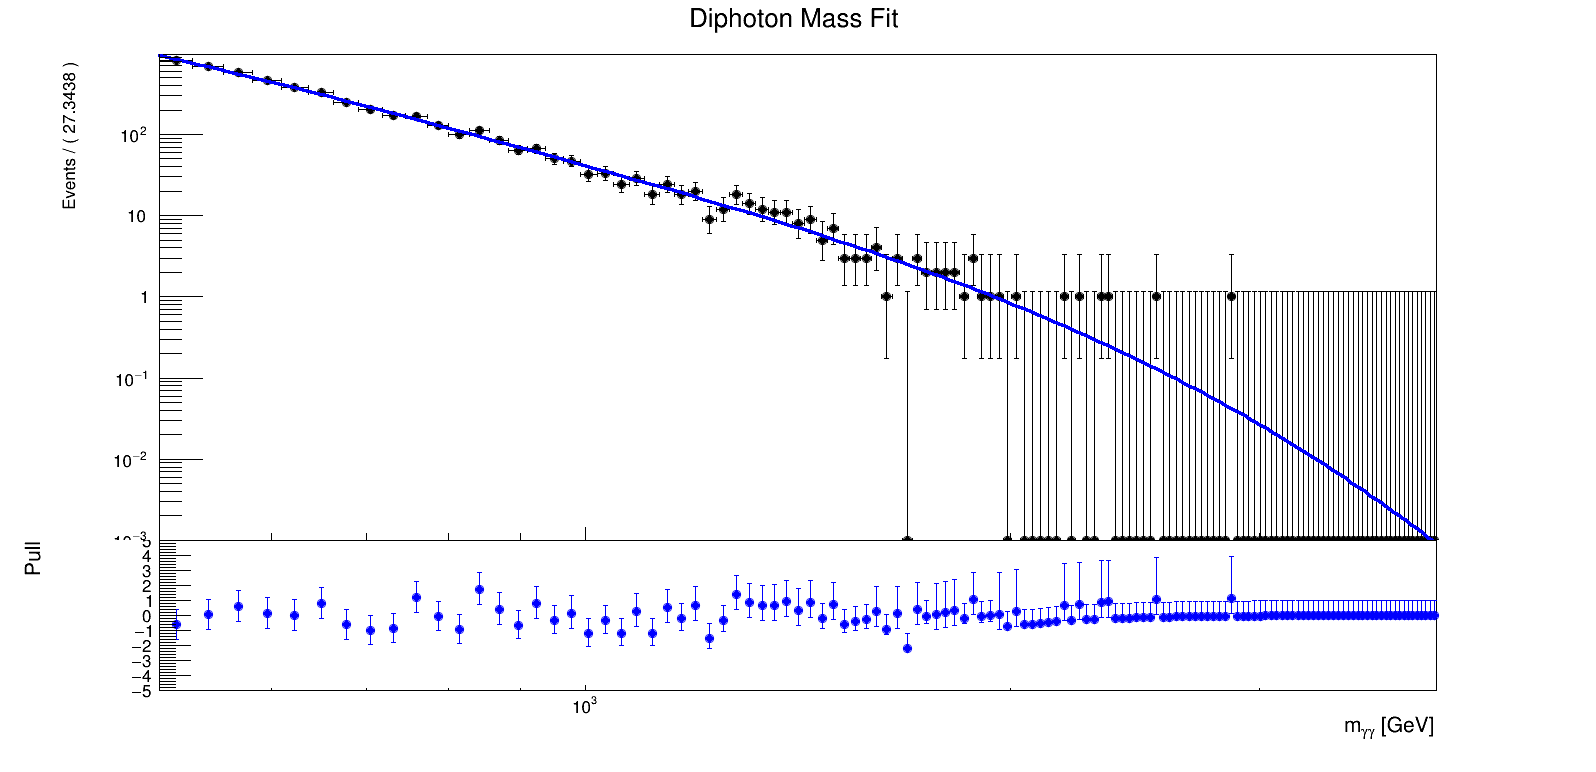

In [93]:
# Fit and plot
model = emm.ExponentialMixtureModel(x, 4, data.mean(x), raw_rate_diff=(1, 0.005, 1000))
fit_and_plot(model, data, x)

Rate scaling factor: -0.00565722090722949


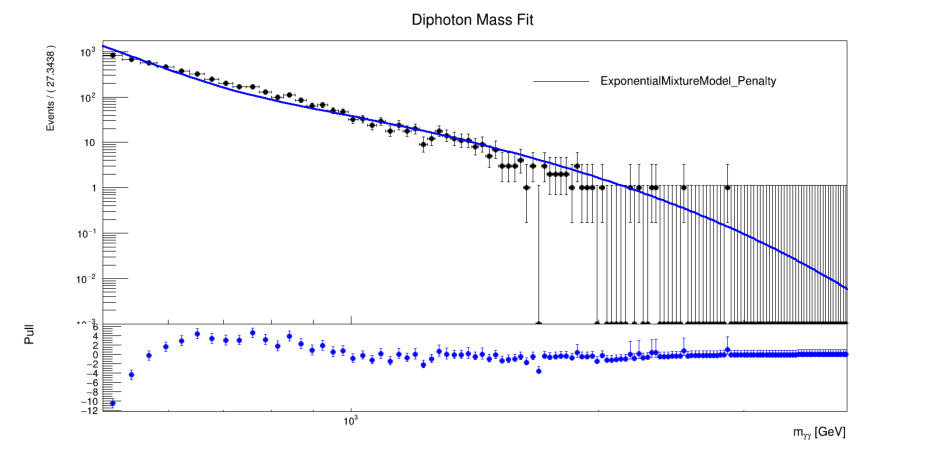

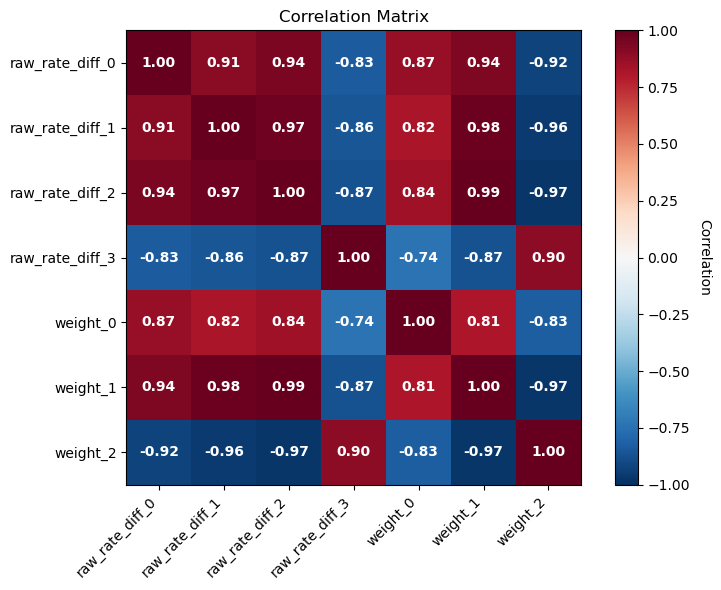

weight_0: 0.24391725471081444 ± 0.02442176228572422
weight_1: 0.21693031039365973 ± 0.17201378285272412
weight_2: 0.49187254636798255 ± 1.5670094638542409e-06
raw_rate_diff_0: 0.4878837367984122 ± 0.03612811085341758
raw_rate_diff_1: 0.2959785538453314 ± 0.11445948171529866
raw_rate_diff_2: 1.8666245711893032 ± 0.820457003689964
raw_rate_diff_3: 2.8514517136368767e-14 ± 1.3552527156068805e-17
raw_rate_0: 0.4878837367984122 ± N/A
raw_rate_1: 0.7838622906437436 ± N/A
raw_rate_2: 2.6504868618330466 ± N/A
raw_rate_3: 2.650486861833075 ± N/A
[#1] INFO:Minimization -- RooFormulaVar::defaultErrorLevel(total_nll) Formula contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 3500 convergence for edm < 1 strategy 1
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.0958
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.0958
[#0] WARN

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       31936.96313 Edm =       8272.967001 NCalls =     29
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -27843065.4
  Edm           : 10636393.49
  Internal parameters:	[     -1.507540228     -1.507540228     -1.507540228     -1.570796706    -0.5235987756    -0.5235987756   -0.01625562317]	
  Internal gradient  :	[      61268.93148      17482.59372      8093.459948 -1.738401929e+13      462485347.3      84343434.44                0]	
  Internal covariance matrix:
[[  6.6581202e-07              0              0              0              0              0              0]
 [              0  1.1946319e-05              0              0              0              0              0]
 [              0      

In [87]:
# Fit and plot
model = emm.ExponentialMixtureModel_Penalty(x, 4, data.mean(x), penalty=0.001)

nll = model.pdf.createNLL(data)
total_nll = ROOT.RooFormulaVar(
    "total_nll", "Total NLL",
    "@0 - @1",  # Subtract the penalty from the NLL
    ROOT.RooArgList(nll, model.penalty)
)

minimizer = ROOT.RooMinimizer(total_nll)
minimizer.minimize("Minuit2", "migrad")
# minimizer.optimizeConst(True)       # optional: optimize constant terms
minimizer.hesse()
# minimizer.minos()  # optional: compute errors using Minos
fit_result = minimizer.save()
# emm_fit_result = emm_model.pdf.fitTo(data, ROOT.RooFit.Save())
fit_and_plot(model, data, x, fit_result=fit_result)

Data mean: 676.7652379849756
Rate scaling factor: -0.00565722090722949
nll: 193223.03705048512
nll-penalty: -337234616168.3625
weight_0: 0.01099585796246254 ± 1.4752700298881205e-07
weight_1: 0.5595449044412311 ± 0.15942528057749825
weight_2: 0.06041378069907585 ± 3.733288302942839e-07
rate_diff_0: 32.367057224953584 ± 2.309987025483906e-05
rate_diff_1: 98.10108855043259 ± 97.12712585337025
rate_diff_2: 15.102915205639926 ± 14.388873276759867
rate_diff_3: 1.4826464708739273e-15 ± 0.0
raw_rate_0: 32.367057224953584
rate_0: -0.18310759283850073
raw_rate_1: 130.46814577538618
rate_1: -0.7380871220079794
raw_rate_2: 145.5710609810261
rate_2: -0.8235276496694399
raw_rate_3: 145.5710609810261
rate_3: -0.8235276496694399
exp_0: 1.1860728922960784e-179
exp_1: 0.0
exp_2: 0.0
exp_3: 0.0
pdf: 1.3041889056814808e-181
penalty_term_0: 1.5447805357310083e-05
penalty_term_1: 5.096783403610818e-06
penalty_term_2: 3.310619130095384e-05
penalty_term_3: 337234809391.3995
[#1] INFO:Minimization -- RooFormu

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       31936.96513 Edm =       8317.460052 NCalls =     29
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : -2.084377543e+11
  Edm           : 2.605472459e+10
  Internal parameters:	[     -1.370461484     -1.370461484     -1.370461484     -1.570796337    -0.5235987756    -0.5055326302   -0.01625560727]	
  Internal gradient  :	[      19980.33857      2251.453949      898.3364563 -1.245228668e+12     -1419.932295  1.103271501e+14                0]	
  Internal covariance matrix:
[[  7.0188458e-06              0              0              0              0              0              0]
 [              0  0.00014429985              0              0              0              0              0]
 [            

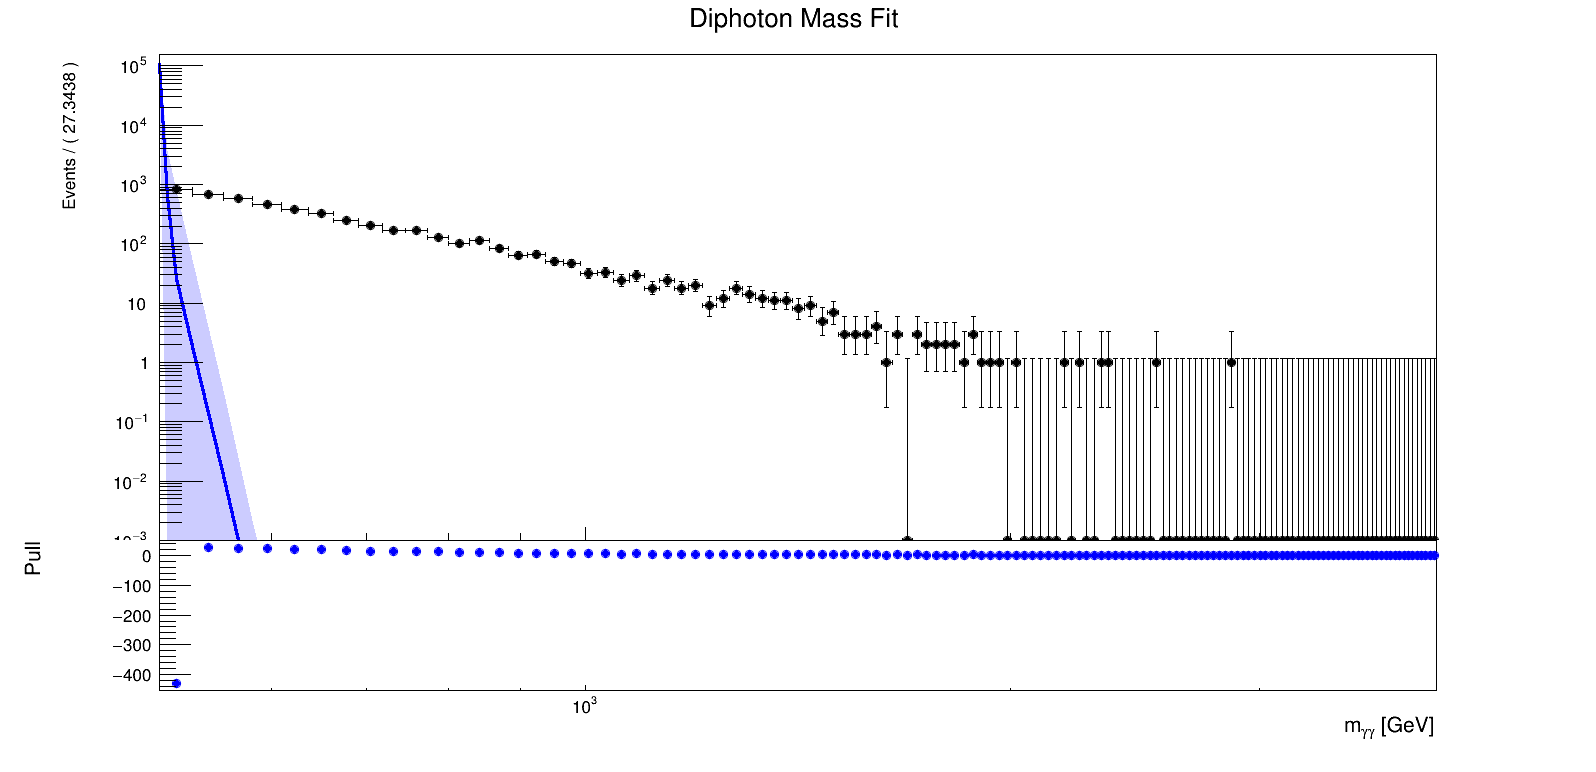

In [24]:
# Fit and plot
penalty=0.0005
def run():

    x = ROOT.RooRealVar("x", "Diphoton Mass [GeV]", 500, 4000)
    data = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(x), ROOT.RooFit.Import(data_tree))

    emm_model = emm.ExponentialMixtureModel_Penalty(x, 4, data, penalty=penalty)

    pdf = emm_model.pdf
    penalty_term = emm_model.penalty

    nll = pdf.createNLL(data)

    total_nll = ROOT.RooFormulaVar(
        "total_nll", "Total NLL",
        "@0 - @1",  # Subtract the penalty from the NLL
        ROOT.RooArgList(nll, penalty_term)
    )

    minimizer = ROOT.RooMinimizer(total_nll)
    minimizer.minimize("Minuit2", "migrad")
    # minimizer.optimizeConst(True)       # optional: optimize constant terms
    minimizer.hesse()
    # minimizer.minos()  # optional: compute errors using Minos
    emm_fit_result = minimizer.save()
    # emm_fit_result = emm_model.pdf.fitTo(data, ROOT.RooFit.Save())


    emm.plot_fits(
        data, x, #bins,
        [emm_model], ["Exponential Mixture with Penalty"],
        [emm_fit_result, None, None],
        logx=True,
        nbins=128
    )
    print("nll:", nll.getVal())
    print("nll-penalty:", total_nll.getVal())
    for var_name, var in emm_model.fitted.items():
        print(f"{var_name}: {var.getVal()} ± {var.getError()}")
    for var_name, var in emm_model.other.items():
        print(f"{var_name}: {var.getVal()}")
run()


nll: 31030.017935977492
nll-penalty: 31031.25781356139
weight_1: 1.2961292152626005 ± 0.1531547431218283
weight_2: 5.886588360987611 ± 2.157273072024467
weight_3: 0.988663582322176 ± 0.025265035624712162
weight_4: 14.711000006778264 ± 14.29063457331326
weight_5: 2.269182248069202 ± 1.364484153446074
weight_6: 1.3612119193403165 ± 0.8477485489094483
raw_rate_0: -0.002496742425214693 ± 0.0004848105323574127
raw_rate_1: -0.002119582211064036 ± 0.0006094687088888522
raw_rate_2: -0.0011417770365412046 ± 0.0003901078560630741
raw_rate_3: -0.0017098466756856191 ± 0.0006599073041868276
raw_rate_4: -0.03909655913338509 ± 0.024699739289401806
raw_rate_5: -0.021471294386545343 ± 0.012934890300646394
raw_rate_6: -0.024683093138550598 ± 0.0179118160014855
raw_rate_7: -0.02932412292075248 ± 0.06460542018581736
sum_weights: 26.51277533276017
rate_0: -0.002496742425214693
rate_1: -0.004616324636278729
rate_2: -0.005758101672819933
rate_3: -0.007467948348505553
rate_4: -0.046564507481890643
rate_5: -0.

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       34824.40603 Edm =       14806.17319 NCalls =     57
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 31361.69617
  Edm           : 527.3660976
  Internal parameters:	[      1.143745017      1.143745017      1.143745017      1.143745017      1.143745017      0.242930089      1.143745017      1.143745017    -0.9844473753    -0.9910924747....     -0.8711701432]	
  Internal gradient  :	[     -4620.298238     -3382.225067      343.9238456     -69.10459455      26.43399314     -6.101509714      71.46670844     -85.41653778     -957.3873728      220.7979697....       74.63275949]	
  Internal covariance matrix:
[[  4.1479699e-05              0              0              0              0              0   

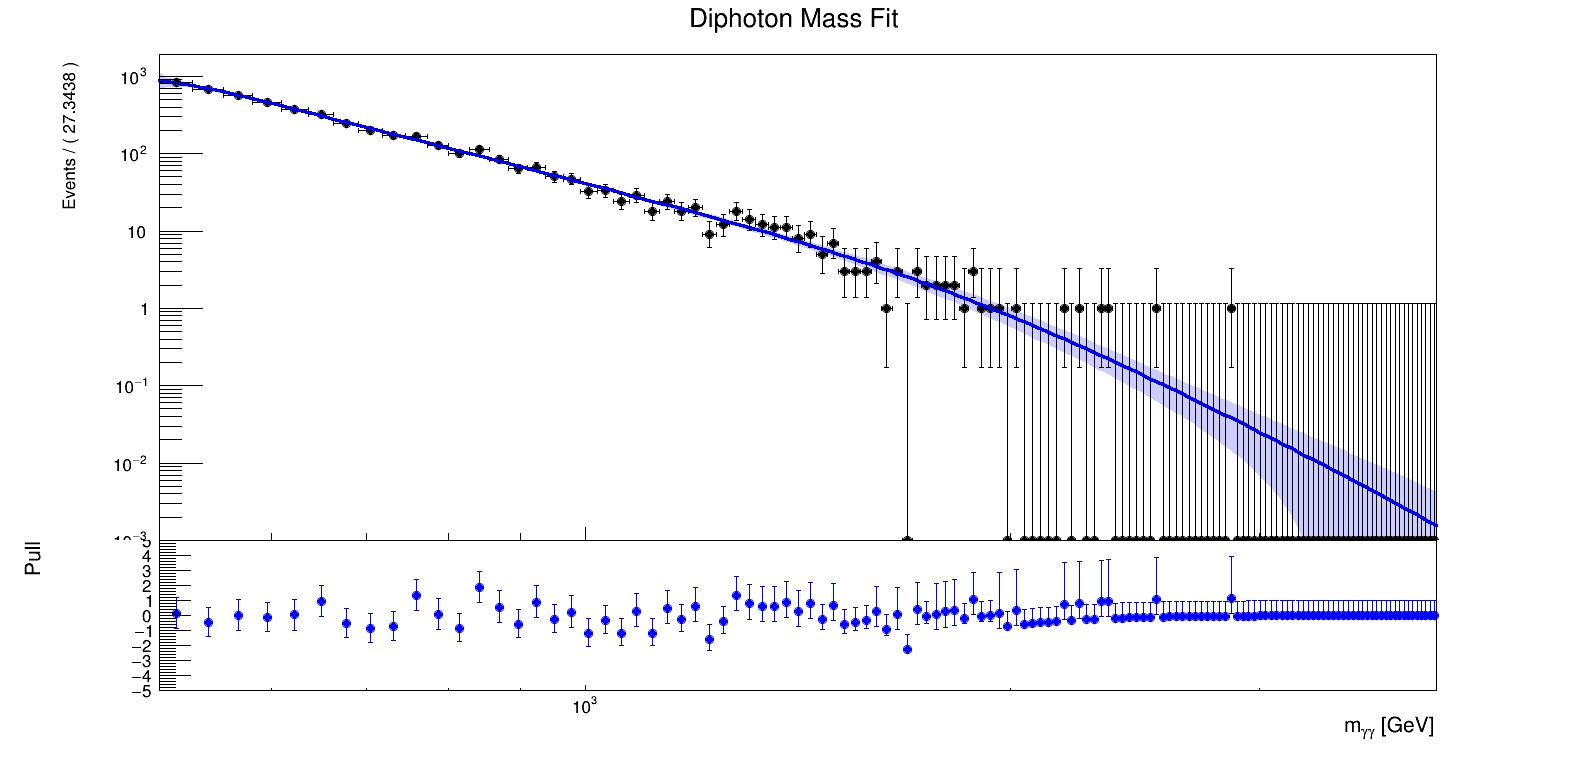

In [132]:
# Fit and plot
x = ROOT.RooRealVar("x", "Diphoton Mass [GeV]", 500, 4000)
data = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(x), ROOT.RooFit.Import(data_tree))

emm_model = emm.ExponentialMixtureModel_Penalty_LooseTail(x, 8)

pdf = emm_model.pdf
penalty = emm_model.penalty

nll = pdf.createNLL(data)

total_nll = ROOT.RooFormulaVar(
    "total_nll", "Total NLL",
    "@0 - @1",  # Subtract the penalty from the NLL
    ROOT.RooArgList(nll, penalty)
)

minimizer = ROOT.RooMinimizer(total_nll)
minimizer.minimize("Minuit2", "migrad")
# minimizer.optimizeConst(True)       # optional: optimize constant terms
minimizer.hesse()
emm_fit_result = minimizer.save()
# emm_fit_result = emm_model.pdf.fitTo(data, ROOT.RooFit.Save())


emm.plot_fits(
    data, x, #bins,
    [emm_model], ["Exponential Mixture with Penalty"],
    [emm_fit_result, None, None],
    logx=True,
    nbins=128
)
print("nll:", nll.getVal())
print("nll-penalty:", total_nll.getVal())
for var_name, var in emm_model.fitted.items():
    if var_name == "weight_0":
        continue
    print(f"{var_name}: {var.getVal()} ± {var.getError()}")
for var_name, var in emm_model.other.items():
    print(f"{var_name}: {var.getVal()}")

In [ ]:
# Plot the AIC/BIC
aic_bic_df = get_AIC_BIC_loo(t=data)
plot_AIC_BIC_loo(df=aic_bic_df,)

# Discussion

Outline:
- Questions
    - How hard do I have to work to overfit?

Actual discussion here